<a href="https://colab.research.google.com/github/L-Gaysina/HW_Python/blob/main/Project_1_Gaisina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
# @title Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
import os
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.
Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов)

In [2]:
# @title Загружаем данные с гугл диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# @title Читаем датасет и выводим размерность датафрейма
data = pd.read_csv('/content/drive/MyDrive/Python+/dst-3.0_16_1_hh_database.csv', sep=';')
data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
# @title Выводим первые 5 строк датафрейма
data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице. Какой тип данных имеют все столбцы? Введите его в поле для ответа.

In [5]:
# @title Выводим основную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений. Выберите все признаки, в которых есть пропуски в данных:

Количество пропущенных значений по столбцам:
Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


<ipython-input-6-3fa43fe8231c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


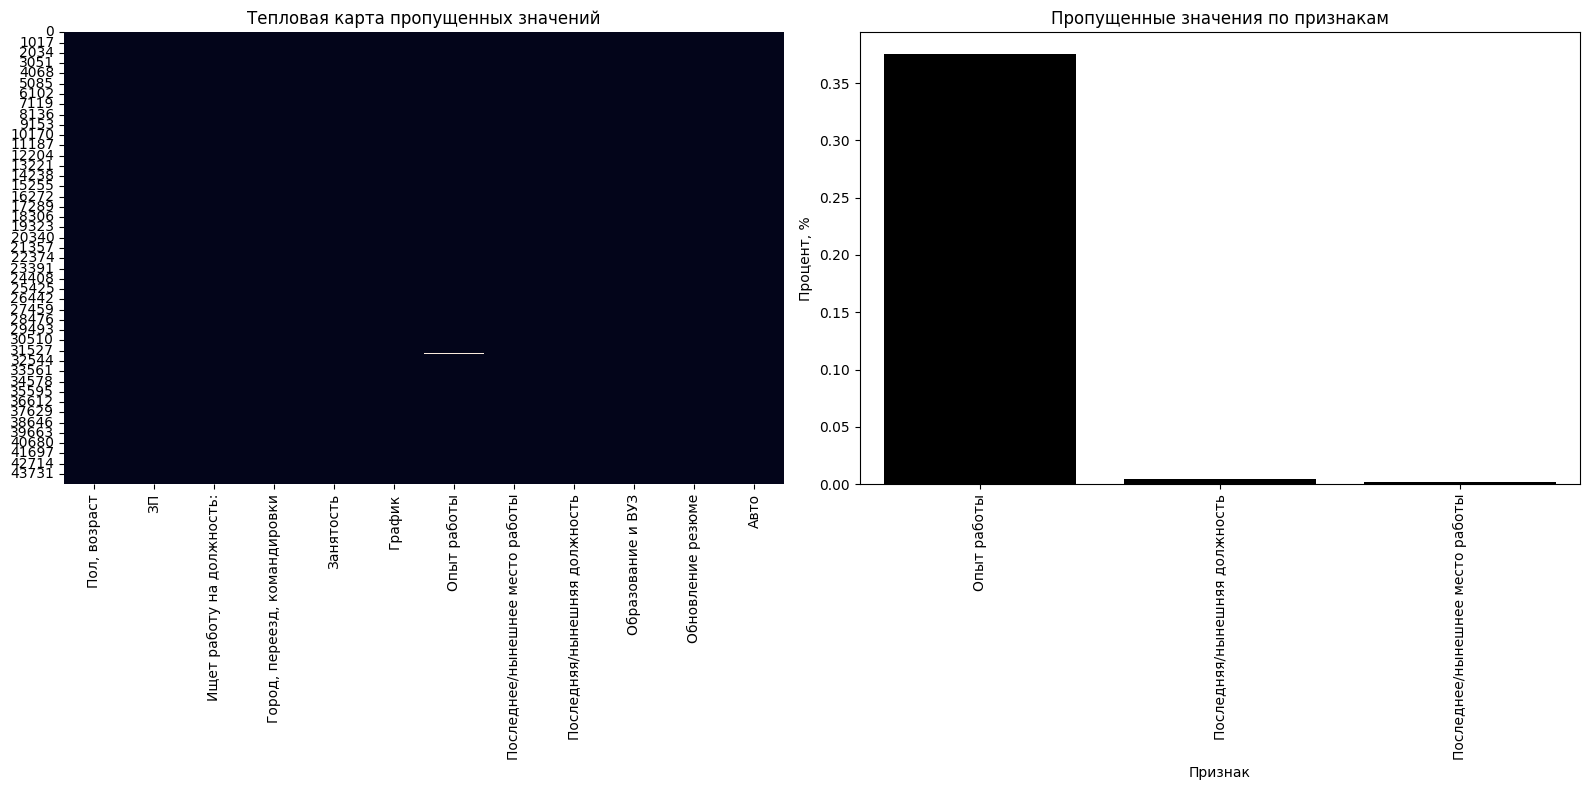

In [6]:
# @title Проверяем пропуски в данных
def check_missing_values(data):
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)

    if cols_with_null.empty:
        print("Пропущенных значений нет.")
    else:
        # Добавляем вывод информации о количестве пропущенных значений для каждой колонки
        num_missing = data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)
        print("Количество пропущенных значений по столбцам:")
        print(num_missing)

        fig, axes = plt.subplots(1, 2, figsize=(16, 8))

        # Карта пропусков
        sns.heatmap(data.isnull(), ax=axes[0], cbar=False)
        axes[0].set_title('Тепловая карта пропущенных значений')

        # Гистограмма процента пропусков в каждой колонке
        bar_plot = sns.barplot(x=cols_with_null.index, y=cols_with_null.values, ax=axes[1], color='black')
        bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
        axes[1].set_ylabel('Процент, %')
        axes[1].set_xlabel('Признак')
        axes[1].set_title('Пропущенные значения по признакам')

        plt.tight_layout()
        plt.show()

# Находим пропуски
check_missing_values(data)

5. Выведите основную статистическую информацию о столбцах. Сколько уникальных значений содержится в столбце «Опыт работы»? Какая из искомых должностей самая распространённая? Введите название.


In [7]:
# @title Выведим основную статистическую информацию о столбцах
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [8]:
# @title Количество уникальных значений в столбце «Опыт работы»
unique_experience_values = data['Опыт работы'].nunique()
print(f'Количество уникальных значений в столбце «Опыт работы» {unique_experience_values}')

Количество уникальных значений в столбце «Опыт работы» 44413


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
# @title Создаем столбец "Образование"
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x:
                                                      'высшее' if 'Высшее' in x.split()[:2] else
                                                      'неоконченное высшее' if 'Неоконченное' in x.split()[:2] else
                                                      'среднее специальное' if 'Среднее специальное' in ' '.join(x.split()[:2]) else
                                                      'среднее')


# Проверяем уникальные категории
unique_education_categories_with_lambda_correct = data['Образование'].unique()
print(*unique_education_categories_with_lambda_correct, sep='\n')

# Удаляем столбец "Образование и ВУЗ"
data.drop('Образование и ВУЗ', axis=1, inplace=True)

неоконченное высшее
высшее
среднее специальное
среднее


In [10]:
# @title Считаем количество кандидатов со средним образованием
applicants_with_secondary_or_vocational_education = ((data['Образование'] == 'среднее')).sum()
print(f'Количество кандидатов со средним образованием: {applicants_with_secondary_or_vocational_education}')

Количество кандидатов со средним образованием: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
# @title Создаем новые признаки "Пол" и "Возраст", применяя лямбда-функции к столбцу "Пол, возраст".
# Для этого сперва разделяем текст по запятым, затем обрабатываем отдельные элементы.

# Создание признака "Пол"
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'М' if 'Мужчина' in x.split(',')[0] else 'Ж')

# Создание признака "Возраст"
data['Возраст'] = data['Пол, возраст'].apply(lambda x: int(x.split(',')[1].split()[0]))

# Удаление старого признака "Пол, возраст"
data.drop('Пол, возраст', axis=1, inplace=True)

# Расчет процента женских резюме
percentage_female = (data['Пол'] == 'Ж').mean() * 100

# Расчет среднего возраста соискателей
average_age = data['Возраст'].mean()

# Вывод информации с использованием f-строк
print(f'Процент женских резюме: {percentage_female:.2f} %')
print(f'Средний возраст соискателей: {average_age:.1f} лет')

Процент женских резюме: 19.07 %
Средний возраст соискателей: 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
# @title Вычисление опыта работы в месяцах
def convert_experience(x):
    if pd.isnull(x) or x == "Не указано":
        return np.nan
    # Очистка строки от текста и извлечение чисел
    years, months = 0, 0
    if 'лет' in x or 'год' in x:
        try:
            years = int(x.split()[2])
        except ValueError:
            years = 0
    if 'месяц' in x:
        try:
            if 'лет' in x or 'год' in x:
                months = int(x.split()[4])
            else:
                months = int(x.split()[2])
        except ValueError:
            months = 0
    total_months = years * 12 + months
    return total_months

# Применяем функцию ко всему столбцу
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(convert_experience)

# Удаление исходного столбца
data.drop('Опыт работы', axis=1, inplace=True)

# Вычисляем медианный опыт работы в месяцах
median_experience = data['Опыт работы (месяц)'].median()

# Выводим результат
median_experience
print(f'Медианный опыт работы (в месяцах): {median_experience}')

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
# @title Создаем признаки "Город", Готовность к переезду" и "Готовность к командировкам"
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                  'Воронеж', 'Волгоград']

# Функции для определения новых признаков Город, Готовность к переезду и Готовность к командировкам
data['Город'] = data['Город, переезд, командировки'].apply(
    lambda x: x.split(',')[0].strip()
    if x.split(',')[0].strip() in ['Москва', 'Санкт-Петербург']
    else ('город-миллионник'
          if x.split(',')[0].strip() in million_cities
          else 'другие')
)
# Создадим функцию для определения готовности к переезду
def get_trip(str):
    str = str.split(',')
    for x in str:
        if re.findall(r'ерее', x) == ['ерее']:
            if ('готов' in x or 'хочу' in x) and ('не готов' not in x):
                return True
            else:
                return False

# Создадим функцию для определения готовности к командировкам
def get_business_trip(str):
    if 'командировка' in str:
        if (re.findall(r'не готов к командировкам', str) == ['не готов к командировкам']) \
        or (re.findall(r'не готова к командировкам', str) == ['не готова к командировкам']):
            return False
        else:
            return True
    else:
        return False

data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_trip)

data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_business_trip)

# Удаление исходного столбца
data.drop('Город, переезд, командировки', axis=1, inplace=True)

# Расчет процентов
percent_spb = (data['Город'] == 'Санкт-Петербург').mean() * 100
percent_ready_for_both = data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] * 100

# Вывод результатов
print(f'Процент соискателей из Санкт-Петербурга: {percent_spb:.0f}%')
print(f'Процент соискателей, готовых к переездам и командировкам: {percent_ready_for_both:.0f}%')

Процент соискателей из Санкт-Петербурга: 11%
Процент соискателей, готовых к переездам и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
# @title Создаем признаки-мигалки (One Hot Encoding) для категорий "Занятость" и "График"
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Используем лямбда-функции для создания новых столбцов в DataFrame
for category in employment_categories:
    data[category] = data['Занятость'].apply(lambda x: category in x)

for category in schedule_categories:
    data[category] = data['График'].apply(lambda x: category in x)

# Находим количество людей, ищущих проектную работу и волонтерство
project_volunteer_count = data[(data['проектная работа']) & (data['волонтерство'])].shape[0]

# Находим количество людей, желающих работать вахтовым методом и с гибким графиком
shift_flexible_count = data[(data['вахтовый метод']) & (data['гибкий график'])].shape[0]

# Удаление исходных столбцов "Занятость" и "График"
data.drop(['Занятость', 'График'], axis=1, inplace=True)

# Вывод результатов
print(f'Количество людей, ищущих проектную работу и волонтерство: {project_volunteer_count}')
print(f'Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_flexible_count}')


Количество людей, ищущих проектную работу и волонтерство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
# @title Загружаем датасет с курсами валют

# Путь к загруженному zip-архиву
zip_path = '/content/drive/MyDrive/Python+/ExchangeRates.zip'
extract_folder = '/content/drive/MyDrive/Python+'

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Загружаем датасет
exchange_rates = pd.read_csv(f'{extract_folder}/ExchangeRates.csv')
exchange_rates

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [16]:
# @title Создаем признак "Желаемая ЗП в рублях"
# Сначала подготовим данные о валютах и резюме
# Преобразование даты в формат datetime
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

# Словарь соответствия валют из таблицы с курсами и данных о зарплатах
currency_mapping = {
    'грн': 'UAH',
    'руб': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'белруб': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}
# Выделение суммы заработной платы и валюты, конвертация наименования валюты в ISO код
def extract_salary_info(salary_str):
    amount, currency = salary_str.split(' ')[0], salary_str.split(' ')[1].replace('.', '')
    iso_currency = currency_mapping.get(currency, None)
    return pd.Series([float(amount), iso_currency])

data[['ЗП сумма', 'Валюта ISO']] = data['ЗП'].apply(extract_salary_info)

# Присоединение таблицы с курсами валют к таблице резюме
merged_df = data.merge(exchange_rates, how='left', left_on=['Обновление резюме', 'Валюта ISO'], right_on=['date', 'currency'])

# Заполнение значений для рубля
merged_df.loc[merged_df['Валюта ISO'] == 'RUB', ['close', 'proportion']] = 1, 1

# Конвертация зарплаты в рубли
merged_df['ЗП (руб)'] = (merged_df['ЗП сумма'] * merged_df['close']) / merged_df['proportion']

# Удаление строк, где есть пропуски в столбцах "Валюта ISO"
merged_df = merged_df.dropna(subset=['Валюта ISO'])

# Удаление исходных и промежуточных столбцов
resume_data = merged_df.drop(columns=['ЗП', 'ЗП сумма', 'Валюта ISO', 'currency', 'per', 'time', 'vol', 'proportion', 'date', 'close'])

# Вычисление медианной заработной платы в рублях
median_salary_rub = resume_data['ЗП (руб)'].median() / 1000 # В тысячах рублей
print(f'Медианная заработная плата соискателей в тысячах рублей: {(median_salary_rub)} тыс. руб.')

<ipython-input-16-8415ffb19cb8>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
<ipython-input-16-8415ffb19cb8>:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date


Медианная заработная плата соискателей в тысячах рублей: 59.0 тыс. руб.


In [17]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

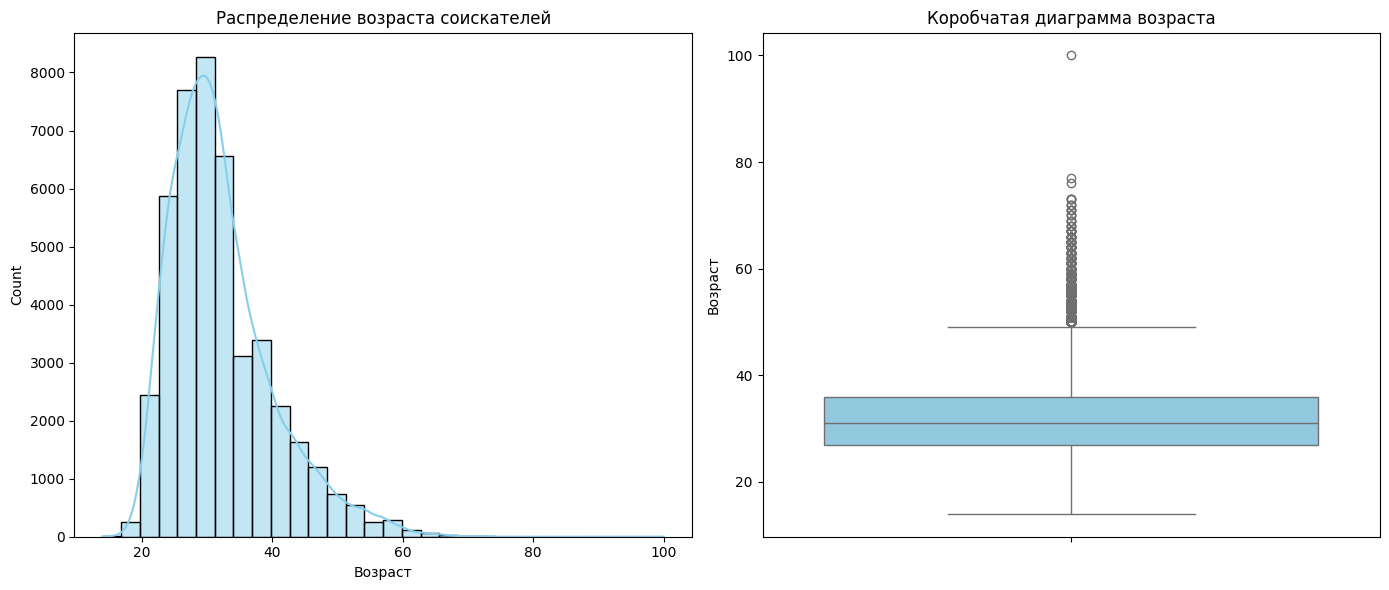


Модальное значение возраста: 30 лет
Минимальный возраст: 14 лет
Максимальный возраст: 100 лет
25-й процентиль (нижняя граница возраста большинства соискателей): 27.0 лет
75-й процентиль (верхняя граница возраста большинства соискателей): 36.0 лет


In [18]:
# @title Распределение признака "Возраст"
# Построим гистограмму распределения возраста
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(resume_data['Возраст'], bins=30, kde=True, color='skyblue')
plt.title('Распределение возраста соискателей')

# Построим коробчатую диаграмму для возраста
plt.subplot(1, 2, 2)
sns.boxplot(y=resume_data['Возраст'], color='skyblue')
plt.title('Коробчатая диаграмма возраста')
plt.tight_layout()
plt.show()

# Вычислим модальное значение возраста
age_mode = resume_data['Возраст'].mode()[0]
age_mode

# Вычисление модального значения возраста
age_mode = resume_data['Возраст'].mode()[0]

# Нахождение минимального и максимального значения возраста
age_min = resume_data['Возраст'].min()
age_max = resume_data['Возраст'].max()

# Определение примерного интервала, в котором находится возраст большинства соискателей
# Для этого используем квантили
age_25_quantile = resume_data['Возраст'].quantile(0.25)
age_75_quantile = resume_data['Возраст'].quantile(0.75)

print(f'\nМодальное значение возраста: {age_mode} лет')
print(f'Минимальный возраст: {age_min} лет')
print(f'Максимальный возраст: {age_max} лет')
print(f'25-й процентиль (нижняя граница возраста большинства соискателей): {age_25_quantile} лет')
print(f'75-й процентиль (верхняя граница возраста большинства соискателей): {age_75_quantile} лет')

### Выводы по графику:
* На гистограмме распределения возраста соискателей видна явная мода в районе 30 лет, что указывает на наибольшую частоту данного возраста среди соискателей. Распределение выглядит нормальным с некоторым правым (положительным) скосом, что обычно для возрастных данных, поскольку количество соискателей старшего возраста обычно меньше.

* Минимальный возраст соискателей составляет 14 лет, что выходит за пределы обычного возраста для трудоустройства и может быть рассмотрено как аномалия или ошибка в данных. Однако в России с 16 лет подростки имеют право трудоустроиться с согласия одного из родителей (опекунов), если это не вредит их здоровью и не мешает получению образования. Также существуют исключения, когда с 14 лет подросток может работать по соглашению с образовательным учреждением и с согласия родителей (опекунов). (ст. 63 Трудового кодекса). Но такие случаи более редки и подлежат дополнительной проверке.

* Максимальный возраст — 100 лет, что тоже может является аномалией, поскольку это непривычно для рынка труда и скорее всего указывает на ошибку ввода данных или фиктивное резюме.

* Возраст большинства соискателей лежит в интервале от 27 до 36 лет, что соответствует 25-му и 75-му процентилям, представленным на коробчатой диаграмме. Это подтверждает, что большая часть соискателей находится в самом начале или в середине своего карьерного пути.

* Коробчатая диаграмма также показывает наличие значительного количества выбросов как снизу, так и сверху, что указывает на наличие соискателей с возрастом за пределами общего диапазона. Точки, расположенные выше верхнего "уса" коробчатой диаграммы, особенно те, что значительно превышают 60 лет, можно считать аномалиями.










2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

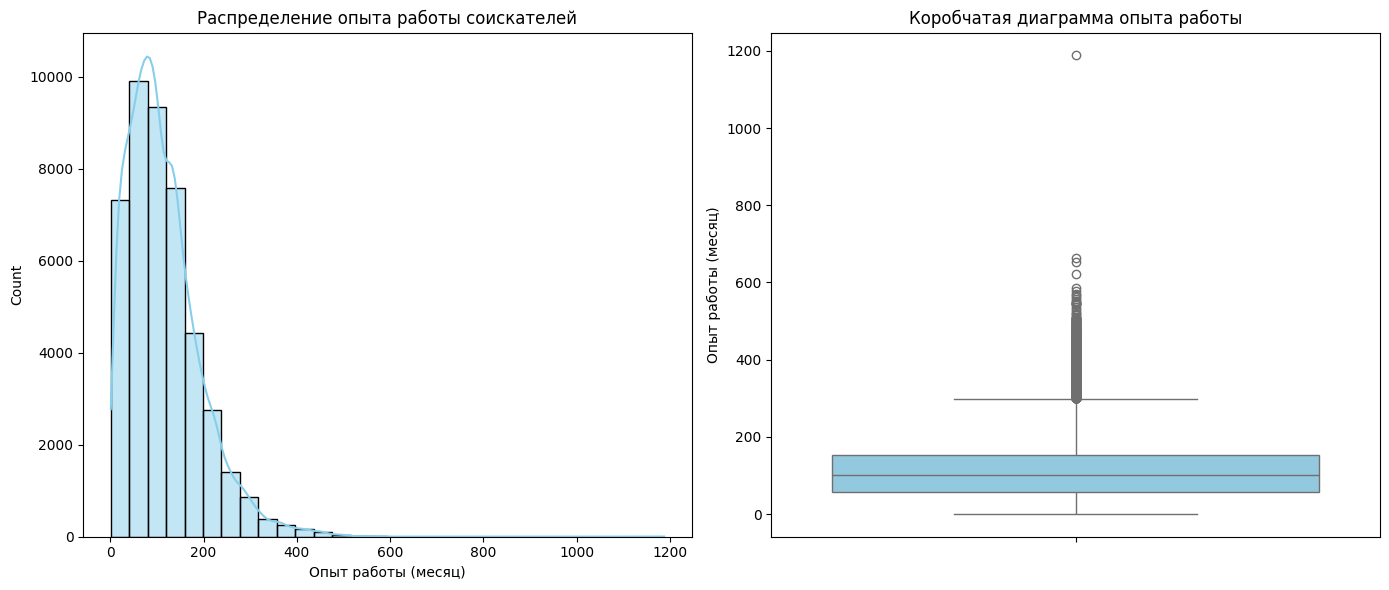


Модальное значение опыта работы: 81.0 месяцев
Минимальный опыт работы: 1.0 месяцев
Максимальный опыт работы: 1188.0 месяцев
25-й процентиль опыта работы (нижняя граница большинства соискателей): 57.0 месяцев
75-й процентиль опыта работы (верхняя граница большинства соискателей): 154.0 месяцев


In [19]:
# @title Распределение опыта работы (в месяцах)
plt.figure(figsize=(14, 6))

# Гистограмма опыта работы
plt.subplot(1, 2, 1)
sns.histplot(resume_data['Опыт работы (месяц)'].dropna(), bins=30, kde=True, color = 'skyblue')
plt.title('Распределение опыта работы соискателей')

# Коробчатая диаграмма опыта работы
plt.subplot(1, 2, 2)
sns.boxplot(y=resume_data['Опыт работы (месяц)'].dropna(), color = 'skyblue')
plt.title('Коробчатая диаграмма опыта работы')
plt.tight_layout()
plt.show()

# Вычисления для ответов на вопросы
exp_mode = resume_data['Опыт работы (месяц)'].mode()[0]
exp_min = resume_data['Опыт работы (месяц)'].min()
exp_max = resume_data['Опыт работы (месяц)'].max()
exp_25_quantile = resume_data['Опыт работы (месяц)'].quantile(0.25)
exp_75_quantile = resume_data['Опыт работы (месяц)'].quantile(0.75)

print(f'\nМодальное значение опыта работы: {exp_mode} месяцев')
print(f'Минимальный опыт работы: {exp_min} месяцев')
print(f'Максимальный опыт работы: {exp_max} месяцев')
print(f'25-й процентиль опыта работы (нижняя граница большинства соискателей): {exp_25_quantile} месяцев')
print(f'75-й процентиль опыта работы (верхняя граница большинства соискателей): {exp_75_quantile} месяцев')



### Выводы:
* На гистограмме распределения опыта работы соискателей видно, что большинство значений сосредоточено в начале диапазона, с модальным значением около 81 месяца (примерно 6.75 лет). Это указывает на то, что наиболее распространённым опытом среди соискателей является около семи лет работы.

* Минимальный опыт работы — 1 месяц, что является приемлемым для тех, кто только начал свою карьеру. Максимальный опыт работы составляет 1188 месяцев (99 лет), что выглядит как аномалия, скорее всего это ошибка ввода данных, так как такой стаж работы крайне маловероятен.

* Опыт работы большинства соискателей лежит в интервале от 57 до 154 месяцев (около 4.75–12.83 лет), что отражено 25-м и 75-м процентилями на коробчатой диаграмме. Это подтверждает, что у большинства соискателей средний опыт работы.

* На коробчатой диаграмме также видны выбросы, которые значительно превышают верхний "ус" диаграммы. Эти значения требуют допольнительной проверки так как могут указывать на аномальный или неверно введённый опыт работы.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное
распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


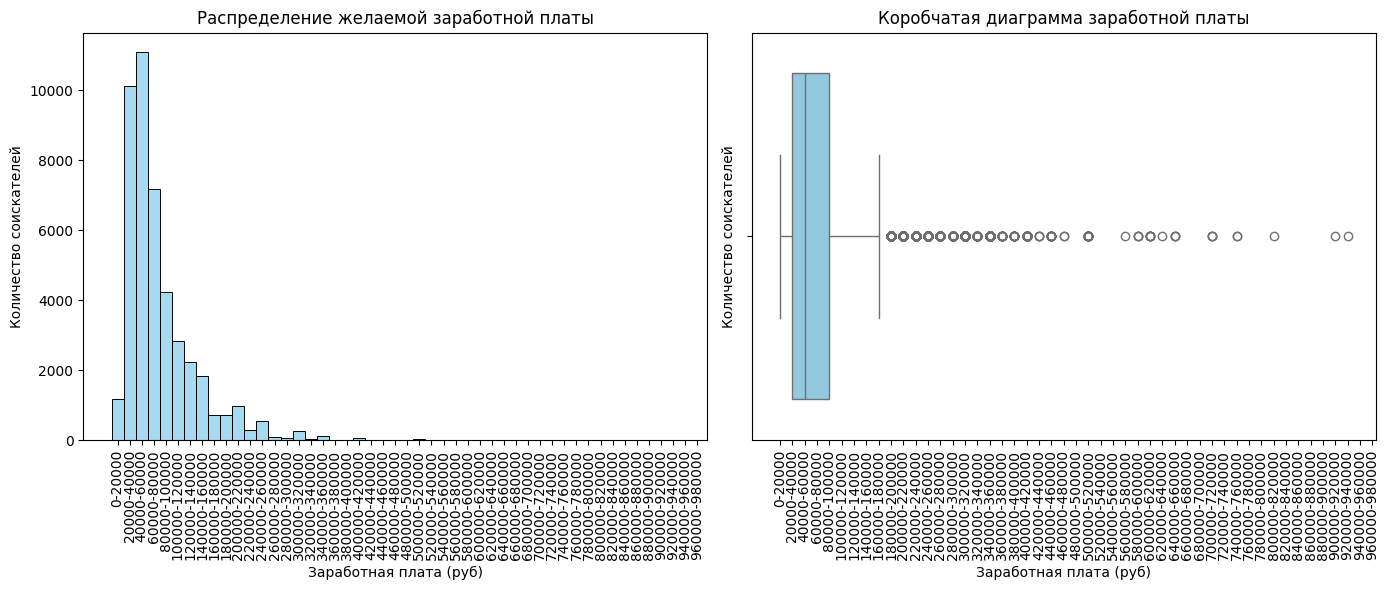


Минимальная желаемая зарплата: 1.0 руб.
Максимальная желаемая зарплата: 24304876.0 руб.
25-й процентиль желаемой зарплаты (нижняя граница большинства соискателей): 37082.2 руб.
75-й процентиль желаемой зарплаты (верхняя граница большинства соискателей): 95000.0 руб.
Количество соискателей с желаемой зарплатой выше 1 миллиона рублей: 5


In [20]:
# @title Распределение признака "Желаемая заработная плата"
# Создание бинов от 0 до 1 миллиона с шагом в 50000
bins = list(range(0, 1000000 + 20000, 20000))

# Создание меток для бинов
labels = [f"{i}-{i + 20000}" for i in bins[:-1]]  # Для каждого интервала кроме последнего
labels[-1] = f"{bins[-1]}+"  # Последняя метка для всего, что выше последнего бина

# Категоризация зарплат
resume_data['ЗП категория'] = pd.cut(resume_data['ЗП (руб)'], bins=bins, labels=labels, right=False)

# Построение графиков
plt.figure(figsize=(14, 6))

# Гистограмма желаемой заработной платы с заданными бинами
plt.subplot(1, 2, 1)
sns.histplot(resume_data, x='ЗП категория', bins=bins, color='skyblue')
plt.title('Распределение желаемой заработной платы')
plt.xlabel('Заработная плата (руб)')
plt.xticks(rotation=90)
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(data=resume_data, x='ЗП категория', color='skyblue')
plt.title('Коробчатая диаграмма заработной платы')
plt.xlabel('Заработная плата (руб)')
plt.xticks(rotation=90)
plt.ylabel('Количество соискателей')

plt.tight_layout()
plt.show()

# Вычисления для ответов на вопросы
salary_min = resume_data['ЗП (руб)'].min()
salary_max = resume_data['ЗП (руб)'].max()
salary_25_quantile = resume_data['ЗП (руб)'].quantile(0.25)
salary_75_quantile = resume_data['ЗП (руб)'].quantile(0.75)

print(f'\nМинимальная желаемая зарплата: {salary_min} руб.')
print(f'Максимальная желаемая зарплата: {salary_max} руб.')
print(f'25-й процентиль желаемой зарплаты (нижняя граница большинства соискателей): {salary_25_quantile} руб.')
print(f'75-й процентиль желаемой зарплаты (верхняя граница большинства соискателей): {salary_75_quantile} руб.')

# Подсчет количества соискателей с желаемой зарплатой выше 1 миллиона рублей
salary_above_1M = resume_data[resume_data['ЗП (руб)'] > 1e6].shape[0]
print(f'Количество соискателей с желаемой зарплатой выше 1 миллиона рублей: {salary_above_1M}')

### Выводы:
* Гистограмма показывает, что большинство соискателей ожидают заработную плату в пределах от 0 до 100 000 рублей. Самая высокая частота встречаемости приходится на диапазон от 20 000 до 40 000 рублей. С увеличением заработной платы количество соискателей резко снижается. Это распределение с правым хвостом, где меньшинство соискателей указывают очень высокую желаемую зарплату.

* Коробчатая диаграмма иллюстрирует размах заработных плат с очень большим количеством выбросов в верхнем диапазоне. Медианное значение, вероятно, находится около 50 000 рублей, что соответствует середине "ящика". Нижний квартиль находится на уровне 37 082,2 рубля, а верхний квартиль — на уровне 95 000 рублей, что указывает на то, что 50% соискателей ожидают зарплату в этом диапазоне.

* Минимальная и максимальная желаемая зарплата: Минимальная заявленная зарплата составляет всего 1 рубль, что может быть следствием либо ошибки ввода данных, либо символического заявления о готовности работать за минимальное вознаграждение. Максимальная желаемая зарплата составляет 24 304 876 рублей, что крайне аномально и указывает либо на чрезмерно оптимистичные ожидания соискателя, либо на ошибку в данных.

*  Соискатели с желаемой зарплатой выше 1 миллиона рублей: Таких соискателей всего пять, и они представляют собой экстремальные выбросы, не характерные для большинства соискателей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

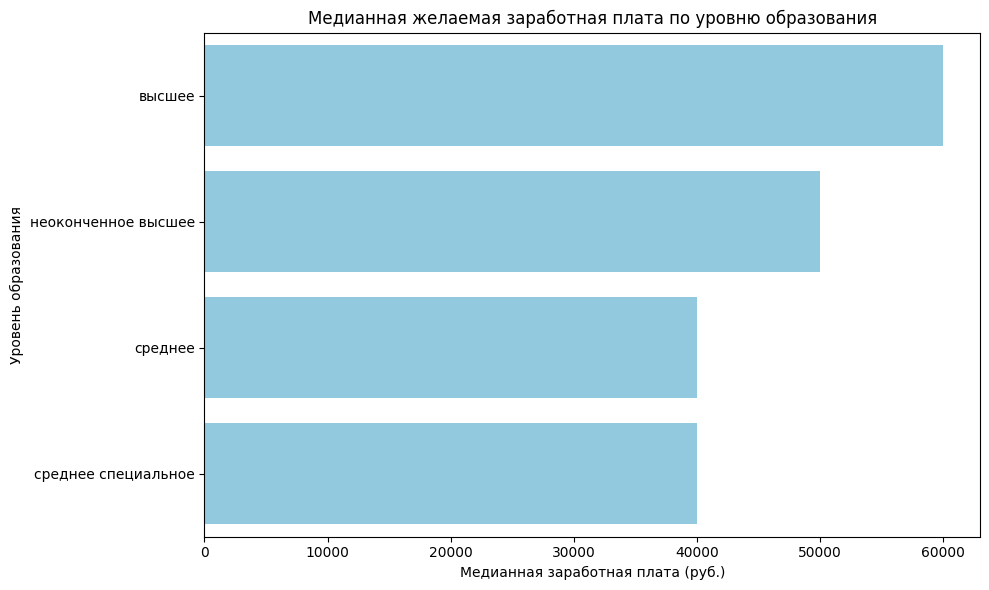

In [21]:
# @title Зависимость медианной желаемой заработной платы от уровня образования

# Фильтрация данных для желаемой заработной платы меньше 1 млн рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Группировка по уровню образования и расчет медианных значений желаемой заработной платы
median_salary_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Сортировка по убыванию медианной заработной платы
median_salary_education_sorted = median_salary_education.sort_values(by='ЗП (руб)', ascending=False)

# Построение горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_education_sorted, color='skyblue')
plt.title('Медианная желаемая заработная плата по уровню образования')
plt.xlabel('Медианная заработная плата (руб.)')
plt.ylabel('Уровень образования')
plt.tight_layout()
plt.show()

### Выводы:
* Наибольшая медианная зарплата наблюдается у соискателей с высшим образованием. Это согласуется с общим представлением о том, что более высокий уровень образования может открывать доступ к работам с более высокой зарплатой, требующим более специализированных навыков и знаний.

* Наименьшая медианная зарплата заметна у соискателей со средним специальным и средним образованием. Это может отражать ограничения в типах доступных должностей, которые часто более низкооплачиваемые и требуют меньше специализированных знаний.

* Соискатели с незаконченным высшим образованием показывают уровень медианной зарплаты между средним специальным и высшим образованием, что может отражать некоторые из преимуществ высшего образования, но без полной квалификации и специализации.

* Признак уровня образования действительно важен при прогнозировании заработной платы, так как он часто коррелирует с квалификацией, специализированными знаниями и навыками, которые требуются на рынке труда. Однако стоит отметить, что уровень образования — это лишь один из многих факторов, влияющих на зарплату, и реальная заработная плата может зависеть от множества других условий, включая опыт работы, отрасль, регион проживания и текущую экономическую ситуацию.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

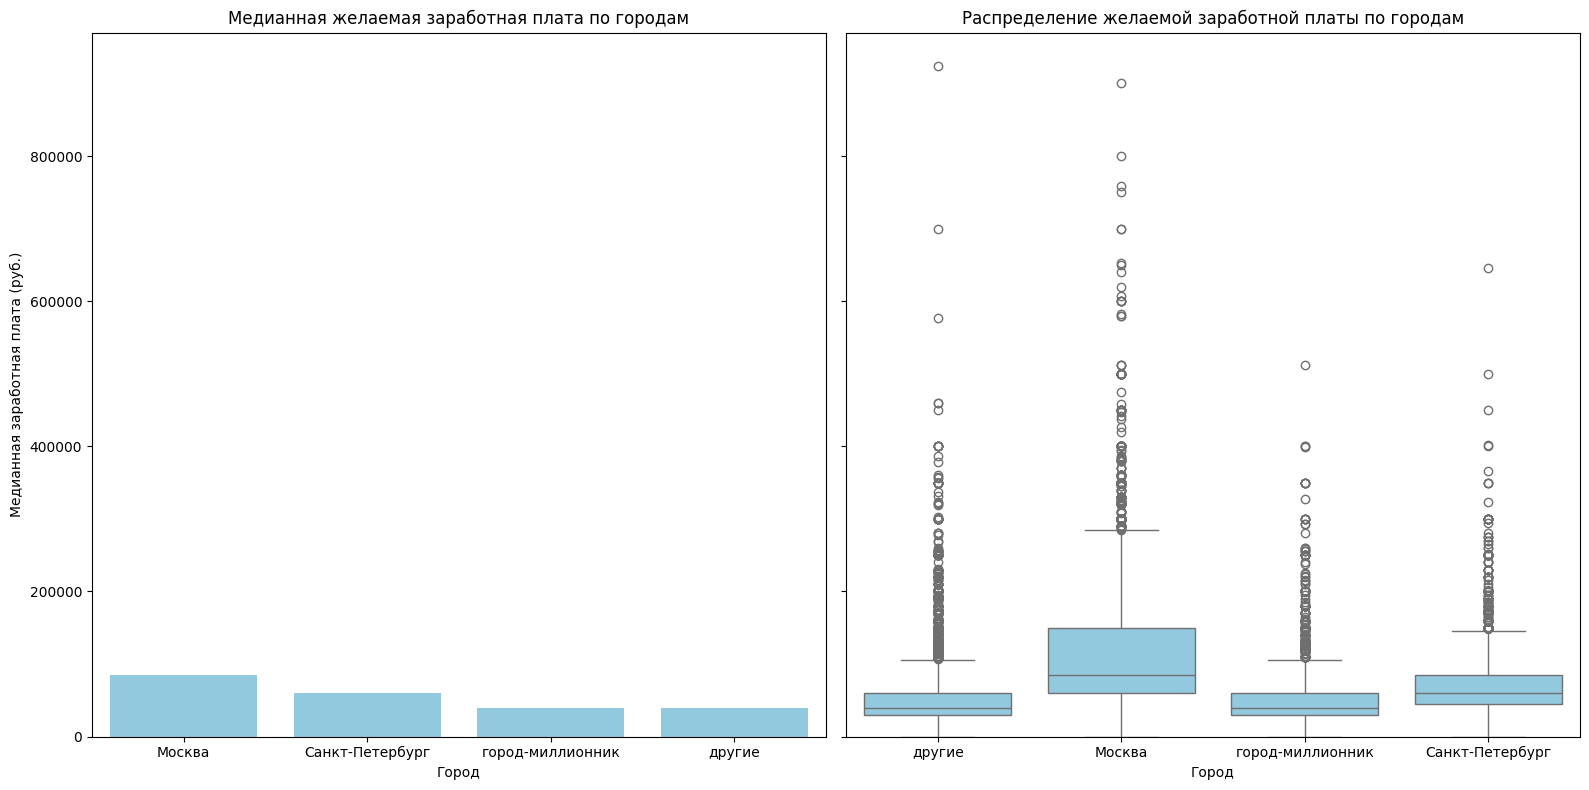

In [22]:
# @title Распределение желаемой заработной платы ("ЗП (руб)") в зависимости от города
# Фильтрация данных для желаемой заработной платы меньше 1 миллиона рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Расчет медианных значений желаемой заработной платы по городам
median_salary_by_city = filtered_data.groupby('Город')['ЗП (руб)'].median().reset_index()

# Создание фигуры и осей для двух субплотов
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Построение столбчатой диаграммы на первом субплоте
sns.barplot(x='Город', y='ЗП (руб)', data=median_salary_by_city, ax=axes[0], color='skyblue')
axes[0].set_title('Медианная желаемая заработная плата по городам')
axes[0].set_xlabel('Город')
axes[0].set_ylabel('Медианная заработная плата (руб.)')


# Построение коробчатой диаграммы на втором субплоте
sns.boxplot(x='Город', y='ЗП (руб)', data=filtered_data, ax=axes[1], color='skyblue')
axes[1].set_title('Распределение желаемой заработной платы по городам')
axes[1].set_xlabel('Город')
axes[1].set_ylabel('Желаемая заработная плата (руб.)')


# Отображение графиков
plt.tight_layout()
plt.show()


###Выводы:
* Медианные уровни зарплат: Москва имеет самую высокую медианную зарплату, за ней следует Санкт-Петербург, города-миллионники и, наконец, другие города. Это отражает общую тенденцию того, что в крупных городах, как правило, более высокие заработные платы, что может быть связано с большими экономическими возможностями и более высокой стоимостью жизни.

* Размах зарплат: На коробчатой диаграмме видно, что в Москве и Санкт-Петербурге размах зарплат значительно шире, чем в других городах или городах-миллионниках. Более широкий размах может указывать на наличие более разнообразных рабочих мест от начального до высококвалифицированного уровня.

* Важность признака города: Признак города является важным фактором при прогнозировании заработной платы, так как он коррелирует с рыночным спросом и предложением, стоимостью жизни и наличием работодателей, способных платить высокую зарплату. Крупные города, такие как Москва и Санкт-Петербург, часто предлагают лучшие возможности для карьерного роста и более высокие зарплаты, что подтверждается данными на диаграмме.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<ipython-input-23-a0e1514db9d7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(['Не готов', 'Готов'])


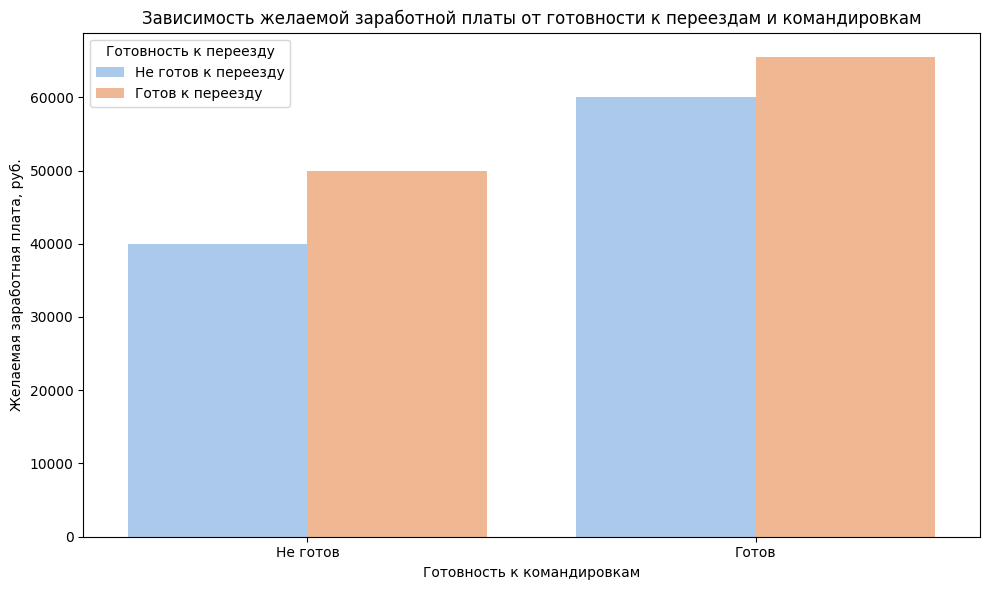

In [23]:
# @title Зависимость медианной заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам".
# Фильтрация данных для желаемой заработной платы меньше 1 миллиона рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Группировка отфильтрованных данных по признакам готовности к переезду и командировкам
grouped_data = filtered_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()



# Строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    data=grouped_data,
    palette='pastel'
)

# Настройка отображения графика
barplot.set_title('Зависимость желаемой заработной платы от готовности к переездам и командировкам')
barplot.set_xlabel('Готовность к командировкам')
barplot.set_ylabel('Желаемая заработная плата, руб.')
barplot.set_xticklabels(['Не готов', 'Готов'])
handles, labels = barplot.get_legend_handles_labels()
labels = ['Не готов к переезду', 'Готов к переезду']
barplot.legend(handles, labels, title='Готовность к переезду')

plt.tight_layout()
plt.show()

###Выводы:
* Соискатели, не готовые к переезду и командировкам, в среднем ожидают меньшую заработную плату по сравнению с теми, кто готов к переезду и/или командировкам.
Кандидаты, готовые к командировкам, имеют более высокий уровень ожидаемой заработной платы, независимо от их готовности к переезду.
* Наибольшая медианная заработная плата наблюдается у соискателей, готовых и к переезду, и к командировкам. Это может отражать их высокую мобильность и гибкость, что ценится работодателями и может быть связано с более высокими требованиями к квалификации и ответственности.
* Готовность к переезду и командировкам может быть важным фактором в некоторых сферах, где требуется высокая степень мобильности. Это может быть особенно актуально для вакансий, связанных с консультационными услугами, управлением проектами, продажами и другими областями, где частые поездки или переезды являются частью работы.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

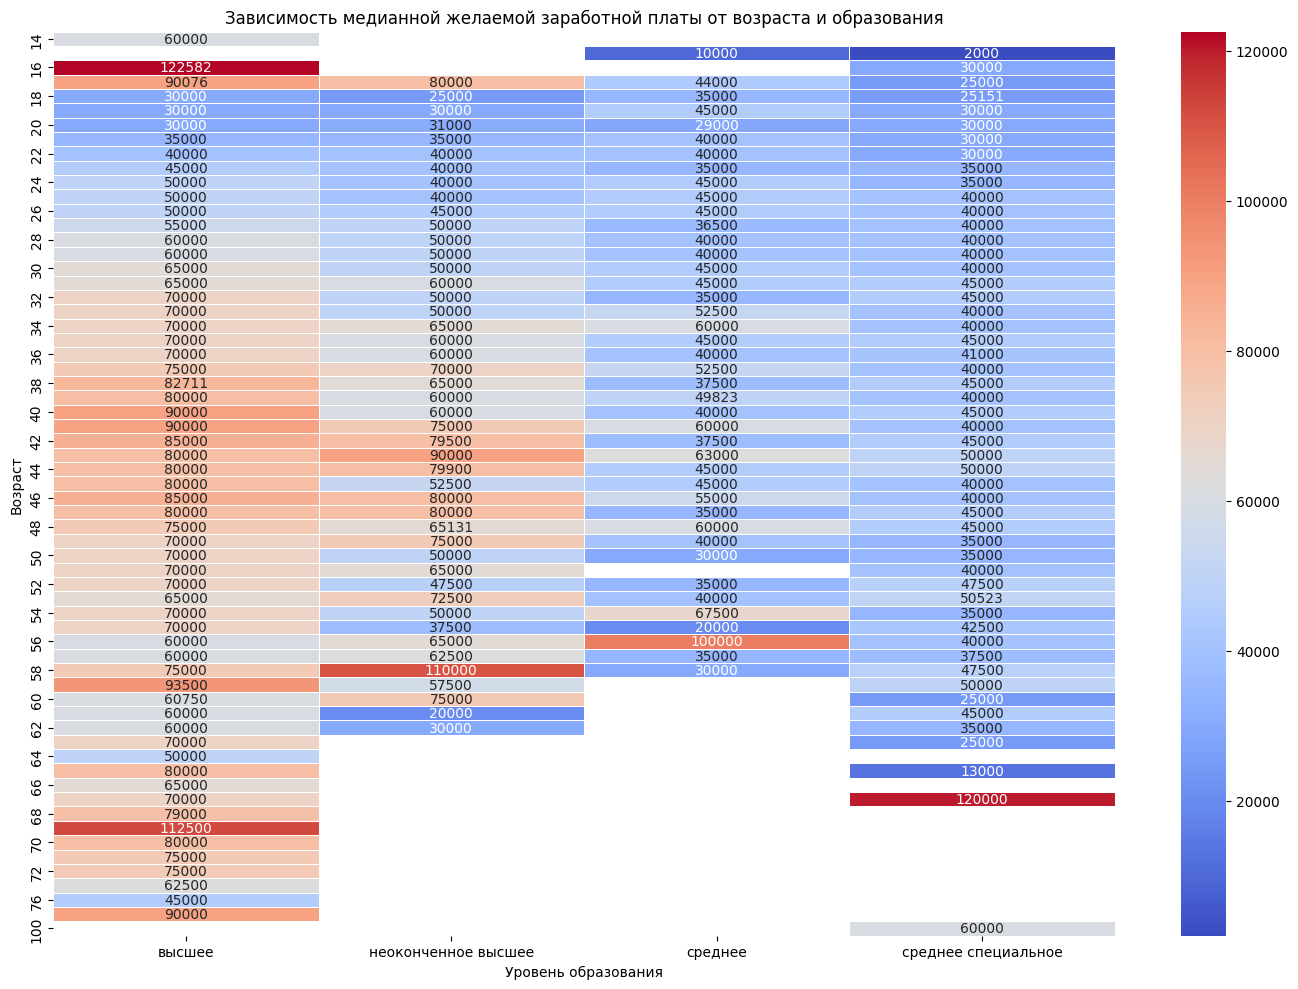

In [24]:
# @title Зависимость медианной желаемой заработной платы от возраста
pivot_table = resume_data.pivot_table(index='Возраст', columns='Образование', values='ЗП (руб)', aggfunc='median')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Зависимость медианной желаемой заработной платы от возраста и образования')
plt.xlabel('Уровень образования')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()


###Выводы:
* Уровень образования: Обычно медианная заработная плата увеличивается с уровнем образования. Так, кандидаты с высшим образованием в среднем указывают более высокие зарплатные ожидания, по сравнению с теми, у кого среднее специальное или среднее образование.

* Возраст кандидатов: Возрастные группы также влияют на зарплатные ожидания. Самые высокие ожидания заработной платы наблюдаются в возрастных категориях от 30 до 50 лет, что может соответствовать пику профессионального развития и наибольшему опыту работы.

* Возрастные группы с высшим образованием: В этих группах наблюдаются наиболее высокие зарплатные ожидания. Это может быть связано с наличием у кандидатов более глубоких специализированных знаний и опыта в определенных областях.

* Нижний возрастной диапазон: Молодые специалисты с высшим образованием имеют более низкие ожидания, вероятно, из-за отсутствия опыта.

* Пожилые кандидаты: В категории за 50 лет зарплатные ожидания начинают уменьшаться, что может быть связано с планированием выхода на пенсию или с трудностями в поиске работы на рынке труда для этой возрастной группы.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

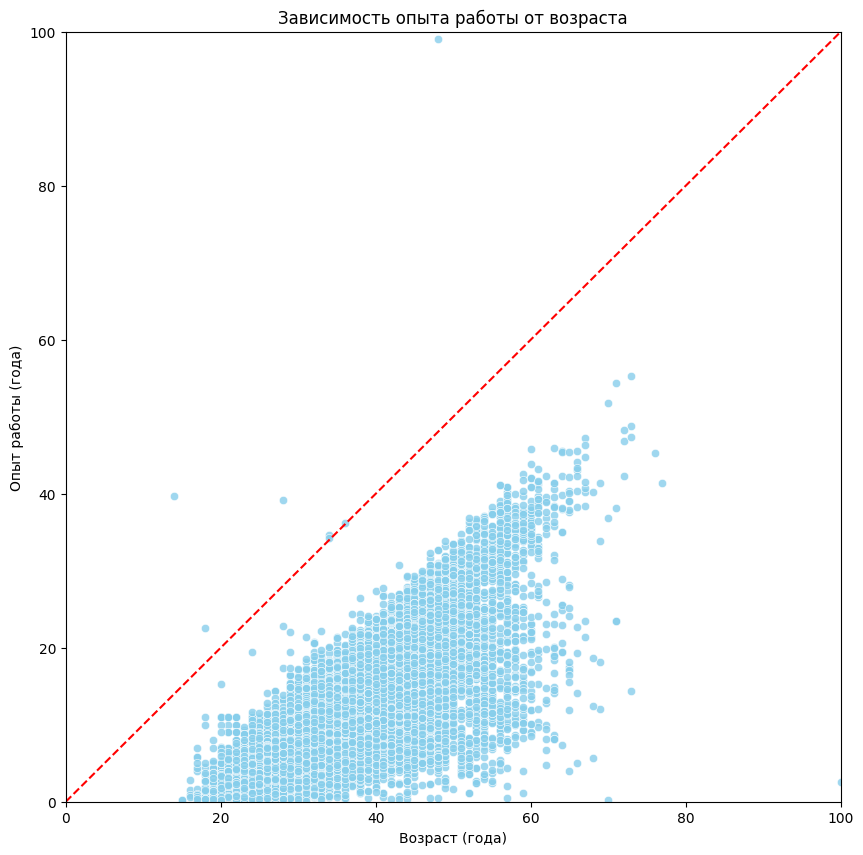

In [25]:
# @title Диаграмма рассеяния, показывающая зависимость опыта работы от возраста
# Перевод опыта работы из месяцев в года
resume_data['Опыт работы (года)'] = resume_data['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Возраст', y='Опыт работы (года)', data=resume_data, alpha=0.8, color='skyblue')

# Добавление прямой, проходящей через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (года)')
plt.ylabel('Опыт работы (года)')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()



###Выводы:
* Существует положительная корреляция между возрастом и опытом работы — по мере увеличения возраста обычно увеличивается и опыт работы. Это соответствует ожиданиям, так как чем старше человек, тем больше у него было времени накопить опыт.

* На графике видны данные, которые подразумевают начало карьеры в районе 18-25 лет, что соответствует обычному возрасту окончания образовательных учреждений и входа в профессиональную жизнь.

* Несмотря на общую тенденцию, существуют исключения, когда у кандидатов сравнительно маленького возраста значительный опыт работы, что может объясняться ранним началом карьеры или включением в опыт работы стажировок и неформального опыта.

* С возрастом около 60 лет и выше количество точек уменьшается, что может указывать на выход людей на пенсию или переход в менее активные формы занятости.

* Потенциальные аномалии: Есть несколько точек, которые показывают очень высокий опыт работы у относительно молодых людей, что выглядит аномально. Это может быть связано с ошибками в данных или с особенностями их заполнения (например, если кандидаты включают в опыт работы время обучения или другую деятельность).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


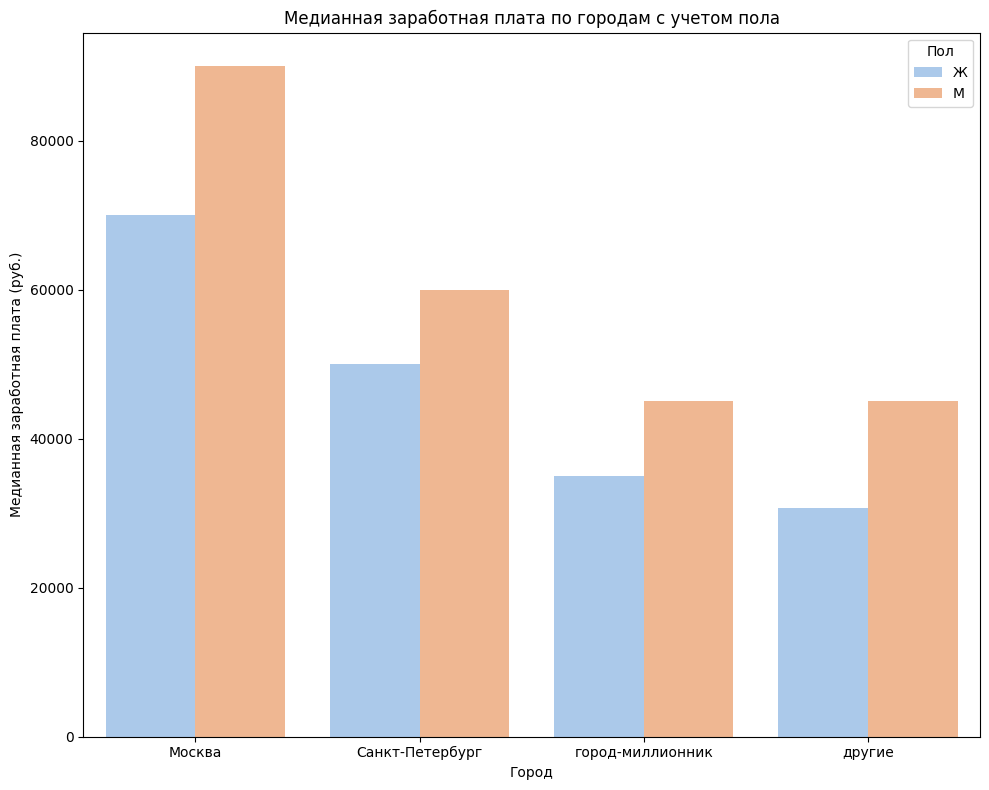

In [26]:
# @title Медианная заработная плата по городам с учетом пола

# Фильтрация данных для желаемой заработной платы меньше 1 миллиона рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Группируем данные по городу и полу и вычисляем медиану зарплаты
median_salary_by_gender_city = filtered_data.groupby(['Город', 'Пол'])['ЗП (руб)'].median().reset_index()

# Построим столбчатую диаграмму
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=median_salary_by_gender_city, x='Город', y='ЗП (руб)', hue='Пол', palette='pastel')
barplot.set_title('Медианная заработная плата по городам с учетом пола')
barplot.set_xlabel('Город')
barplot.set_ylabel('Медианная заработная плата (руб.)')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()


###Выводы:
* Различия по городам: Москва и Санкт-Петербург показывают более высокую медианную заработную плату по сравнению с городами-миллионниками и другими городами. Это может отражать более высокую стоимость жизни и большее количество высокооплачиваемых вакансий в крупных мегаполисах.

* Различия по полу: На диаграмме видно, что во всех категориях городов медианная заработная плата мужчин в среднем выше, чем у женщин. Это может указывать на существующий гендерный разрыв в заработных платах.

* Наибольший разрыв по полу: Наиболее заметный разрыв между заработными платами мужчин и женщин наблюдается в Москве. Это может быть связано с различиями в секторах занятости, где мужчины могут чаще занимать более высокооплачиваемые должности.

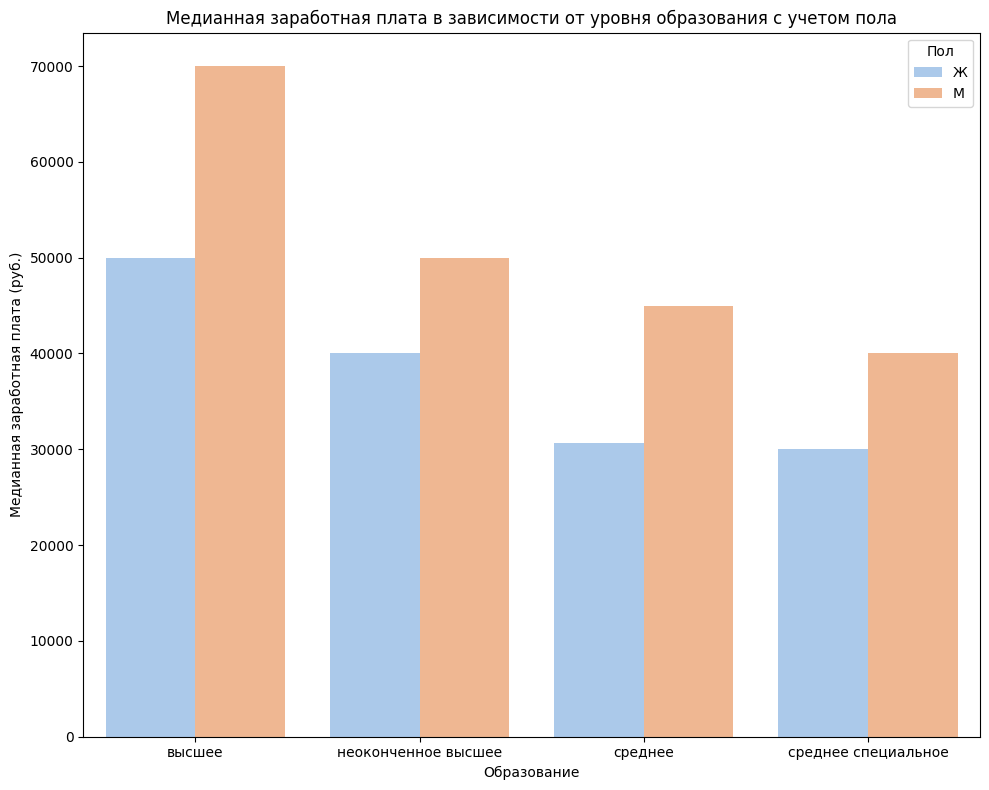

In [27]:
# @title Медианная заработная плата в зависимости от уровня образования с учетом пола

# Фильтрация данных для желаемой заработной платы меньше 1 миллиона рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Группируем данные по городу и полу и вычисляем медиану зарплаты
median_salary_by_gender_education = filtered_data.groupby(['Образование', 'Пол'])['ЗП (руб)'].median().reset_index()

# Построим столбчатую диаграмму
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=median_salary_by_gender_education, x='Образование', y='ЗП (руб)', hue='Пол', palette='pastel')
barplot.set_title('Медианная заработная плата в зависимости от уровня образования с учетом пола')
barplot.set_xlabel('Образование')
barplot.set_ylabel('Медианная заработная плата (руб.)')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

###Выводы:
* Уровень образования: Медианная заработная плата возрастает с уровнем образования. Соискатели с высшим образованием в среднем указывают на более высокие зарплатные ожидания по сравнению с теми, у кого образование неполное высшее, среднее или среднее специальное.

* Различия по полу: На всех уровнях образования медианная заработная плата мужчин выше, чем у женщин. Это согласуется с широко известным явлением гендерного разрыва в оплате труда. Наибольший разрыв в зарплатных ожиданиях между мужчинами и женщинами наблюдается у соискателей с высшим образованием. Это может отражать гендерные стереотипы в отношении высококвалифицированных должностей или неравенство в карьерных возможностях.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [28]:
# @title Проверяем наличие дубликатов в данных.

def find_duplicates(data):
    duplicates = data[data.duplicated(subset=data.columns)]
    num_duplicates = duplicates.shape[0]

    if num_duplicates == 0:
        print('Дубликаты не найдены')
    else:
        print(f'Число явных дублей: {num_duplicates}')

    return duplicates

# Проверяем наличие дубликатов
data_duplicates = find_duplicates(resume_data)


Число явных дублей: 161


In [29]:
# Удаляем дублирующиеся строки
resume_data = resume_data.drop_duplicates()

# Проверяем
data_duplicates = find_duplicates(resume_data)

Дубликаты не найдены


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

Количество пропущенных значений по столбцам:
Опыт работы (месяц)                168
Опыт работы (года)                 168
ЗП категория                         6
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


<ipython-input-6-3fa43fe8231c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


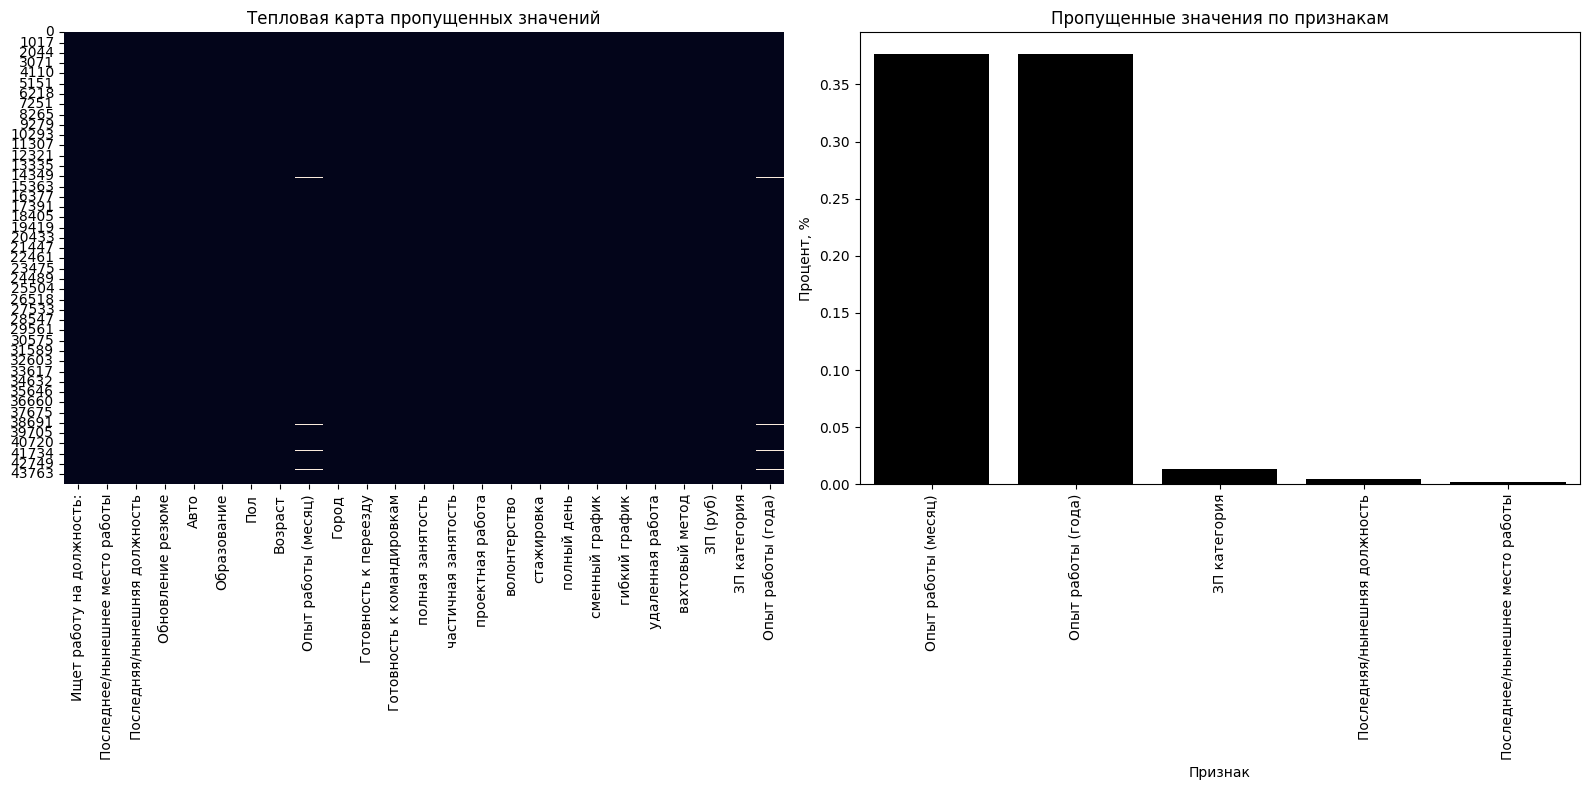

In [30]:
# Находим пропуски
check_missing_values(resume_data)

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

<ipython-input-31-1d32eabb1ac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы (месяц)'].fillna(median_experience)


Количество пропущенных значений по столбцам:
Опыт работы (года)    168
ЗП категория            6
dtype: int64


<ipython-input-6-3fa43fe8231c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


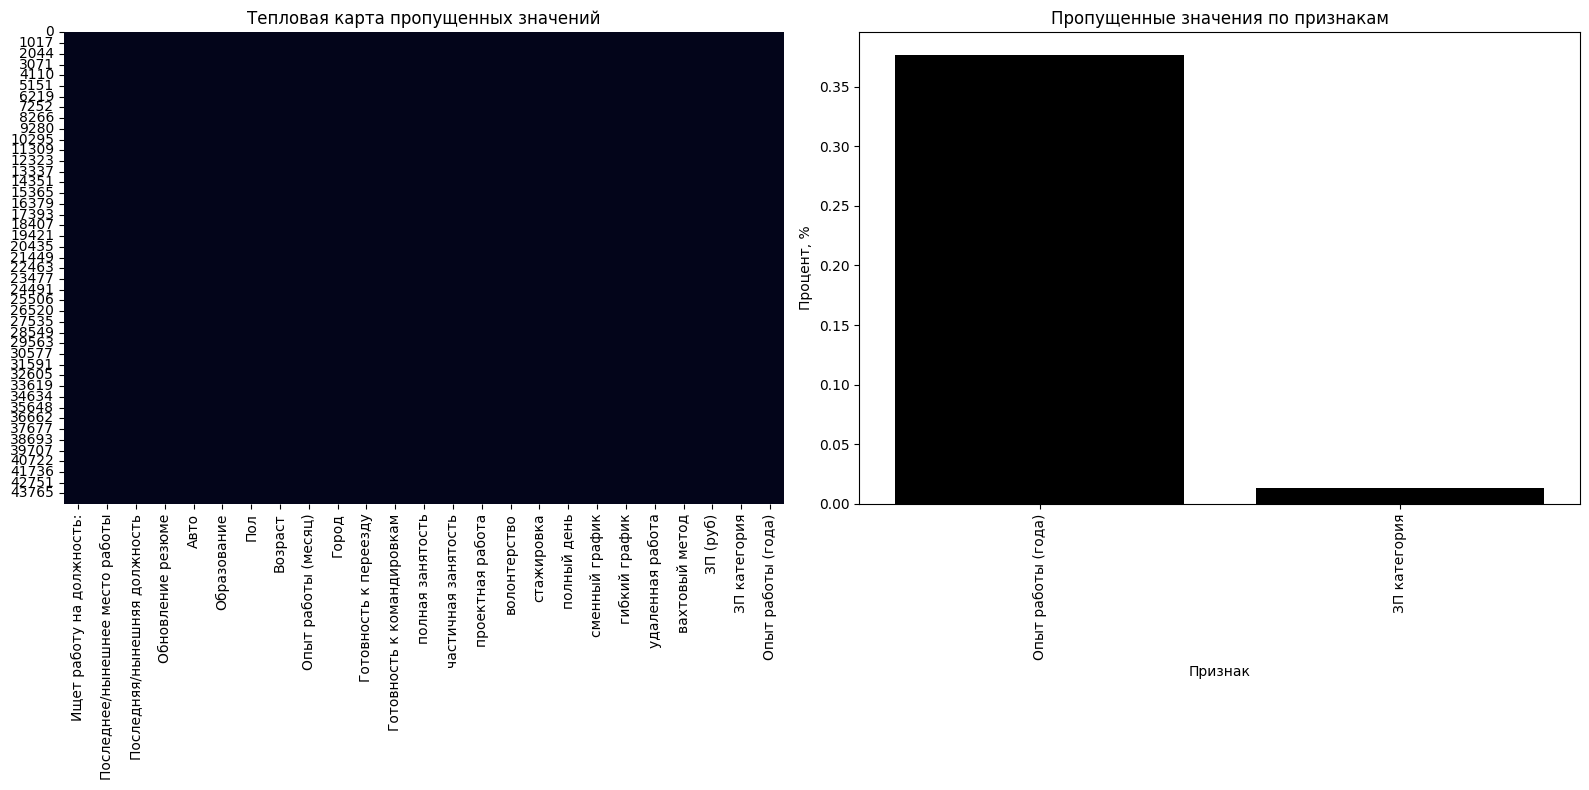

In [31]:
# Удаление строк, где есть пропуски в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
resume_data = resume_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в столбце "Опыт работы (месяц)" медианным значением
median_experience = resume_data['Опыт работы (месяц)'].median()
resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы (месяц)'].fillna(median_experience)

# Проверка на отсутствие пропусков в указанных столбцах
check_missing_values(resume_data)


In [32]:
# Расчет среднего значения в столбце "Опыт работы (месяц)" после заполнения пропусков
average_experience_after_filling = resume_data['Опыт работы (месяц)'].mean()
print(f"Результирующее среднее значение опыта работы (в месяцах) после заполнения пропусков: {average_experience_after_filling}")


Результирующее среднее значение опыта работы (в месяцах) после заполнения пропусков: 114.57811623785918


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [33]:
# Вычисление количества резюме с зарплатой выше 1 млн рублей или ниже 1 тыс. рублей
outliers_count = resume_data[(resume_data['ЗП (руб)'] > 1000000) | (resume_data['ЗП (руб)'] < 1000)].shape[0]
print(f"Количество выбросов: {outliers_count}")

# Удаление резюме с заработной платой выше 1 млн рублей или ниже 1 тыс. рублей
resume_data = resume_data[(resume_data['ЗП (руб)'] <= 1000000) & (resume_data['ЗП (руб)'] >= 1000)]

# Проверка размера данных после удаления
print(resume_data.shape)


Количество выбросов: 89
(44492, 25)


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [34]:
# Вычисление количества резюме, где опыт работы в годах превышает возраст соискателя
experience_outliers_count = resume_data[resume_data['Опыт работы (месяц)'] / 12 > resume_data['Возраст']].shape[0]

# Удаление таких резюме из данных
resume_data = resume_data[~(resume_data['Опыт работы (месяц)'] / 12 > resume_data['Возраст'])]

print(f"Количество найденных выбросов: {experience_outliers_count}")

Количество найденных выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

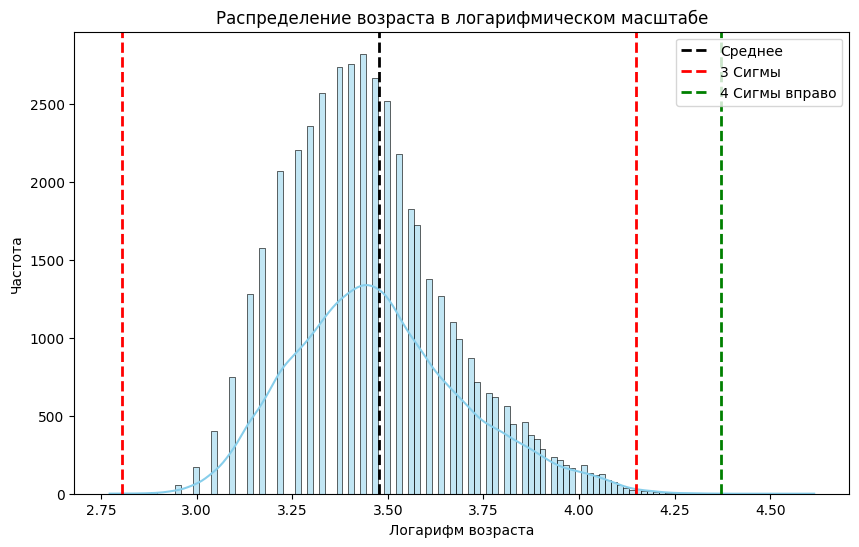

In [35]:
# Построение распределения возраста в логарифмическом масштабе
plt.figure(figsize=(10, 6))
log_age = np.log1p(resume_data['Возраст'])  # Логарифмирование возраста
histplot = sns.histplot(log_age, kde=True, color='skyblue')
histplot.axvline(log_age.mean(), color='k', linestyle='--', lw=2, label='Среднее')
histplot.axvline(log_age.mean() + 3*log_age.std(), color='r', linestyle='--', lw=2, label='3 Сигмы')
histplot.axvline(log_age.mean() - 3*log_age.std(), color='r', linestyle='--', lw=2)
histplot.axvline(log_age.mean() + 4*log_age.std(), color='g', linestyle='--', lw=2, label='4 Сигмы вправо')

plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [36]:
# Нахождение z-отклонений для возраста
z_scores = (log_age - log_age.mean()) / log_age.std()
outliers = resume_data[(z_scores > 4) | (z_scores < -3)]  # Выбросы за пределами 3 сигм влево и 4 сигм вправо

# Вывод таблицы с выбросами и количество найденных выбросов
print("Таблица с выбросами по возрасту:")
print(outliers[['Возраст']])
print(f"Количество найденных выбросов: {outliers.shape[0]}")


Таблица с выбросами по возрасту:
       Возраст
31137       15
32950       15
33654      100
Количество найденных выбросов: 3



В представленной таблице выделены три выброса:

* Два соискателя с возрастом 15 лет, что значительно меньше среднего по выборке и может указывать на то, что это очень молодые люди, возможно еще не имеющие законного права на работу в полной мере.
* Один соискатель с возрастом 100 лет, что выглядит крайне необычно и скорее всего является ошибкой ввода данных или аномалией.

### Выводы:

* Возраст в 15 лет может быть допустим в датасете, если речь идет о стажировках или учебных вакансиях, но в целом такой возраст кажется необычным для рабочей силы.
* Возраст в 100 лет, вероятно, является ошибкой и должен быть исключен из анализа или подвергнут дополнительной проверке.
* Для точного определения значений, попадающих под категорию выбросов, необходимо рассчитать их, исходя из распределения возраста. Это поможет определить, какие возрастные значения являются реалистичными и могут быть включены в анализ, и какие следует исключить как неправдоподобные.

#BONUS. ИНТЕГРАЦИЯ ДАННЫХ О ЗАРПЛАТАХ В РАЗЛИЧНЫХ РЕГИОНАХ

Данное задание не является обязательным, но, выполнив его, вы получите возможность заработать дополнительные 3 балла.

**ЦЕЛЬ ЗАДАНИЯ:**
Расширить имеющийся датасет данными о средних зарплатах в различных регионах с целью улучшения прогноза уровня заработной платы для пользователей.

**ШАГИ ВЫПОЛНЕНИЯ:**

Подготовка данных:
* Загрузите данные о средних зарплатах в различных регионах. Эти данные могут быть доступны в открытых источниках статистики труда или экономических данных.
* Проверьте соответствие формата и структуры загруженных данных с имеющимся датасетом.

Интеграция данных:
* Объедините данные о зарплатах с основным датасетом, используя общий ключ, такой как регион или город.
* Убедитесь в корректности объединения данных и отсутствии пропусков или несоответствий.

Анализ новых данных:
* Проведите первичный анализ новых данных о зарплатах в различных регионах. Это может включать в себя вычисление средних, медианных и других статистических показателей.
* Визуализируйте данные, например, построив графики распределения заработных плат по регионам.

Оценка влияния:
* Оцените влияние новых данных о зарплатах на качество модели. Это можно сделать, например, сравнивая метрики качества модели до и после интеграции новых данных.

Данные о средних ЗП взяты из [Ростата](https://rosstat.gov.ru/storage/mediabank/Reg_Rus_Pokaz_2023.htm)

In [64]:
# @title Подготовка данных:

# Загрузка данных
salary_data = pd.read_csv('/content/drive/MyDrive/Python+/Stat.csv', sep=';')

# Переименовываем первый столбец в "Город"
salary_data.rename(columns={salary_data.columns[0]: 'Город'}, inplace=True)

# Преобразуем названия городов, удаляя "г. "
salary_data['Город'] = salary_data['Город'].str.replace('г. ', '')

# Удаление всех строк, содержащих "округ", кроме "автономный"
salary_data = salary_data[~salary_data['Город'].str.contains("округ", case=False) | salary_data['Город'].str.contains("автономный", case=False)]

# Удаление строки с индексом 0, если это еще необходимо
# Предполагается, что индексация может быть сброшена после предыдущих операций, поэтому следует проверить, нужен ли этот шаг
if 0 in salary_data.index:
    salary_data = salary_data.drop(index=0)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                  'Воронеж', 'Волгоград']

# Функции для определения новых признаков Город
salary_data['Город'] = salary_data['Город'].apply(
    lambda x: x.split(',')[0].strip()
    if x.split(',')[0].strip() in ['Москва', 'Санкт-Петербург']
    else ('город-миллионник'
          if x.split(',')[0].strip() in million_cities
          else 'другие'))


# Определяем столбец для переименования в "Средняя ЗП по региону" и удаляем пропуски
column_name = salary_data.columns[6]  # Предполагая, что это правильный столбец
salary_data = salary_data.dropna(subset=[column_name]).rename(columns={column_name: 'Средняя ЗП по региону'})

# Удаление пробелов и замена запятых на точки
salary_data['Средняя ЗП по региону'] = salary_data['Средняя ЗП по региону'].str.replace('\xa0', '').str.replace(',', '.').astype(float)



# Оставляем только необходимые столбцы
salary_data = salary_data[['Город', 'Средняя ЗП по региону']]

# Создание сводной таблицы для категорий городов и средней зарплаты по регионам
pivot_table = salary_data.pivot_table(index='Город', values='Средняя ЗП по региону', aggfunc='mean').reset_index()


# Округление средней зарплаты до ближайших тысяч
pivot_table['Средняя ЗП по региону'] = (np.round(pivot_table['Средняя ЗП по региону'] / 1000) * 1000).astype(int)


pivot_table

,Город,Средняя ЗП по региону
0,Москва,126000
1,Санкт-Петербург,87000
2,другие,55000


In [65]:
# Подготавливаем resume_data

# Заменяем названия городов-миллионников на "другие" в столбце "Город"
resume_data['Город'] = resume_data['Город'].apply(lambda x: "другие" if x in ['город-миллионник'] else x )
resume_data.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),ЗП категория,Опыт работы (года)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,False,False,True,True,True,True,True,29000.0,20000-40000,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,False,False,True,True,True,True,False,40000.0,40000-60000,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,True,False,False,False,False,20000.0,20000-40000,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,False,False,False,False,True,True,False,100000.0,100000-120000,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,True,False,False,False,False,140000.0,140000-160000,5.583333


In [66]:
# @title Интеграция данных

# Объединяем данные, используя общий ключ "Город"
merged_data = pd.merge(resume_data, pivot_table, on='Город', how='left')

# Удаление столбцов "Опыт работы (года)" и "Средняя ЗП по региону" из resume_data
merged_data = merged_data.drop(columns=['Опыт работы (года)', 'ЗП категория'])

# Проверяем на наличие пропусков после объединения
missing_values = merged_data.isnull().sum()
print("Пропущенные значения после объединения:\n", missing_values)


Пропущенные значения после объединения:
 Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
Средняя ЗП по региону              0
dtype: int64


In [70]:
# Убеждаемся в корректности объединения
unique_salaries = merged_data['Средняя ЗП по региону'].unique()

# Вывод уникальных значений
print(unique_salaries)

[ 55000 126000  87000]


In [71]:
merged_data.tail()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Средняя ЗП по региону
44480,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,True,False,False,True,False,50000.0,55000
44481,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,False,False,True,True,True,True,False,39000.0,55000
44482,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,другие,...,False,False,False,True,False,False,True,False,40000.0,55000
44483,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,False,False,False,True,False,20000.0,55000
44484,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,2018-07-05,Не указано,высшее,М,38,190.0,Москва,...,False,False,False,True,False,False,False,False,120000.0,126000


In [72]:
# @title Анализ новых данных:
# Вычисление основных статистических показателей для "Средняя ЗП по региону"
salary_stats = merged_data['Средняя ЗП по региону'].describe()

# Вывод статистических показателей
print(salary_stats)


count     44485.000000
mean      84927.908284
std       33036.268841
min       55000.000000
25%       55000.000000
50%       55000.000000
75%      126000.000000
max      126000.000000
Name: Средняя ЗП по региону, dtype: float64


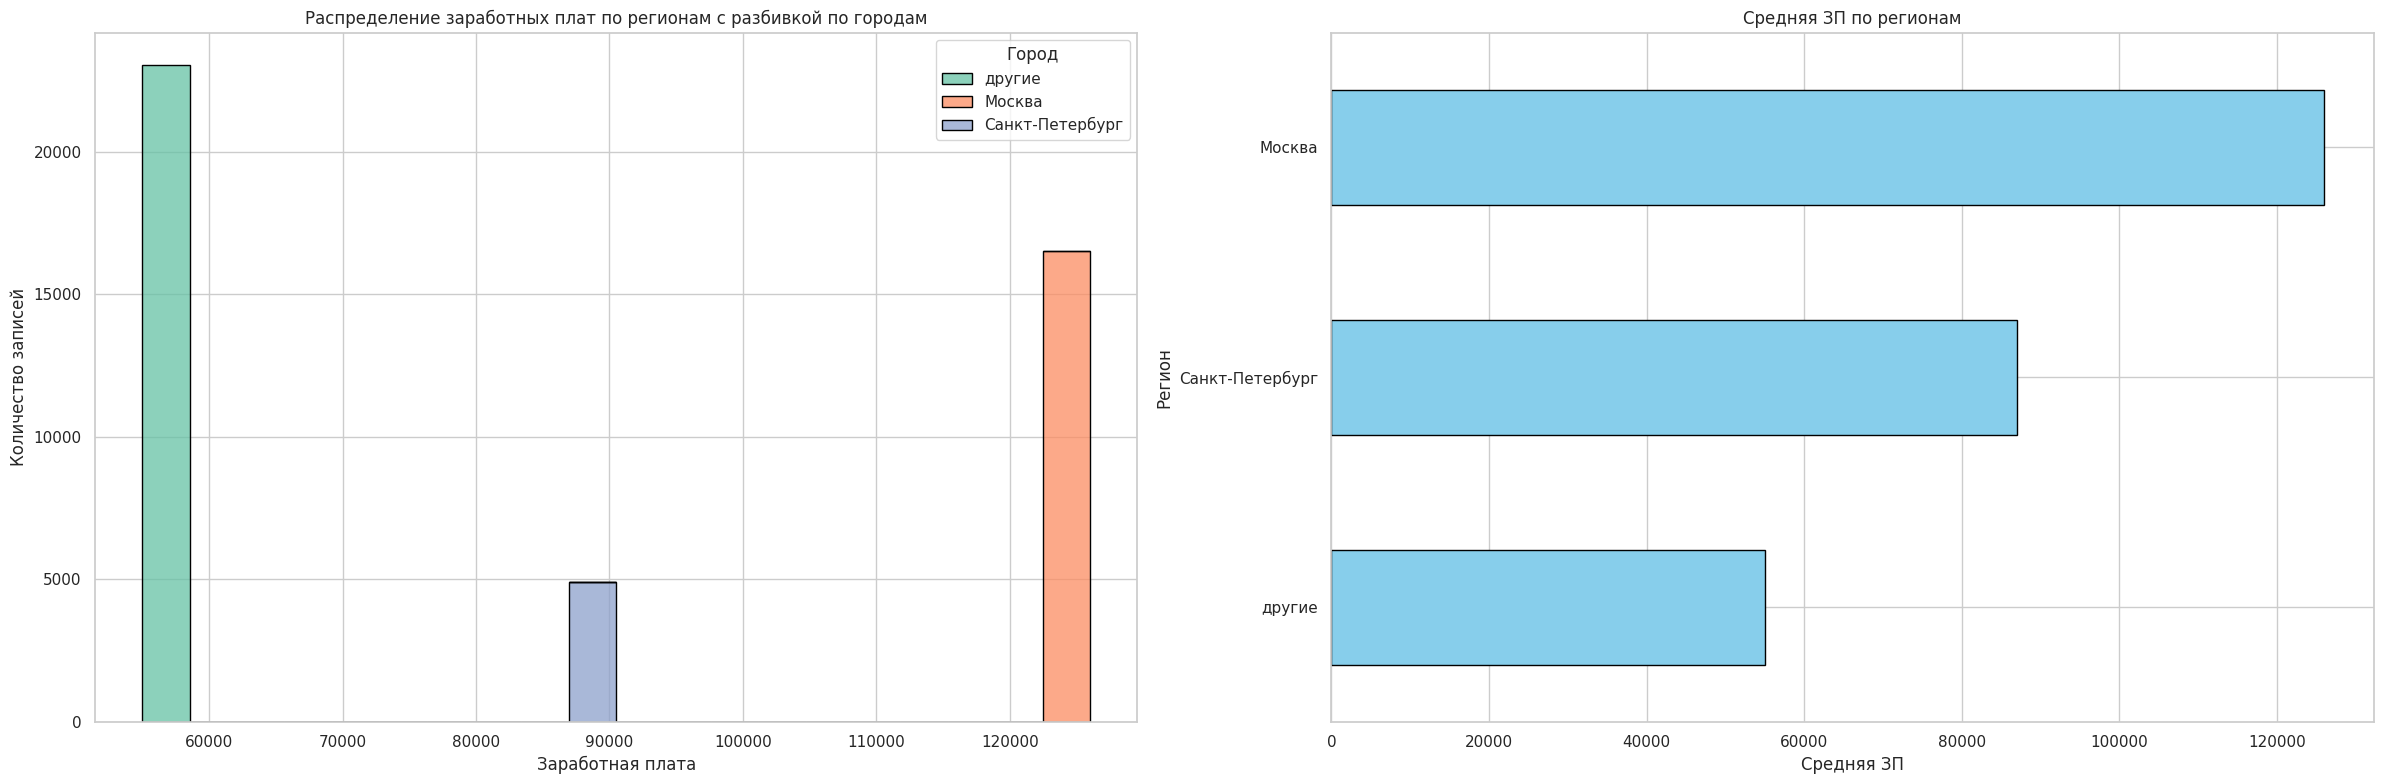

In [79]:
# Настройка размера и стиля графиков
plt.figure(figsize=(24, 8))
sns.set(style="whitegrid")

# Первый график - гистограмма с разбивкой по городам
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, первый график
sns.histplot(data=merged_data, x='Средняя ЗП по региону', hue='Город', multiple='stack', bins=20, palette='Set2', edgecolor='black')
plt.title('Распределение заработных плат по регионам с разбивкой по городам')
plt.xlabel('Заработная плата')
plt.ylabel('Количество записей')

# Второй график - график средней зарплаты по регионам
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй график
merged_data.groupby('Город')['Средняя ЗП по региону'].mean().sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Средняя ЗП по регионам')
plt.xlabel('Средняя ЗП')
plt.ylabel('Регион')

# Отображаем графики
plt.tight_layout()
plt.show()


### Выводы:

* Есть явное разделение между заработными платами в столичных регионах и остальной частью страны.
* В Москве заработные платы значительно выше, что может быть связано с большей концентрацией высокооплачиваемых рабочих мест и головных офисов компаний.
* На гистограмме видно, что большинство заработных плат в регионах сосредоточено в низшем диапазоне, что указывает на меньшие возможности трудоустройства на высокооплачиваемые должности.
